# AWS QuickSight 서비스 이용에 필요한 사전 정보

## 참고사이트(계속해서 수정예정)

### 블로그
* https://velog.io/@juhyeon1114/posts
* https://inpa.tistory.com/entry/AWS-%F0%9F%93%9A-Athena-%EC%82%AC%EC%9A%A9%EB%B2%95-%EC%A0%95%EB%A6%AC-S3%EC%97%90-%EC%A0%80%EC%9E%A5%EB%90%9C-%EB%A1%9C%EA%B7%B8-%EC%BF%BC%EB%A6%AC%ED%95%98%EA%B8%B0
* https://mingyucloud.tistory.com/entry/AWS-QuickSight%EB%A5%BC-%ED%99%9C%EC%9A%A9%ED%95%9C-%EA%B3%B5%EA%B3%B5-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%8B%9C%EA%B0%81%ED%99%94#google_vignette
* https://devocean.sk.com/blog/techBoardDetail.do?ID=166010&boardType=techB
* https://www.slideshare.net/slideshow/1-aws-quicksight/251216246
### 유투브
* https://www.youtube.com/watch?v=r55FmaUCChU
* https://www.youtube.com/watch?v=CQ6WNfk41nM&t=447s
* https://www.youtube.com/watch?v=7V28RjcQY5slogchBlog

## 데이터 분석 준비시 선택사항

1. **직접 RDS에서 QuickSight로 연결**:
QuickSight는 다양한 데이터 소스와 직접 연결할 수 있으며, 그 중 하나가 AWS RDS입니다. RDS 인스턴스에 직접 연결하면 QuickSight가 실시간으로 데이터를 쿼리하여 대시보드를 생성할 수 있습니다.
이 방법은 실시간 데이터 분석이 필요하거나, 데이터 양이 크지 않을 때 적합합니다.

2. **AWS DMS(Database Migration Service)와 S3를 활용**:
AWS DMS를 이용하여 RDS 데이터를 S3로 복제하고, 그 데이터를 QuickSight에서 사용할 수 있습니다.
이 방법은 다음과 같은 경우에 유용할 수 있습니다:
대용량 데이터: 대량의 데이터를 실시간으로 쿼리하는 대신, S3에 저장된 데이터를 분석하면 성능 및 비용 측면에서 효율적일 수 있습니다.
데이터 아카이빙: 분석을 위해 데이터를 장기간 보관해야 하거나, 데이터의 스냅샷을 유지해야 하는 경우.
비용 절감: RDS 인스턴스에 직접 연결하여 실시간 쿼리를 자주 실행하는 것보다 S3에 저장된 데이터를 분석하는 것이 비용 면에서 유리할 수 있습니다.할 수 있습니다.할 수 있습니다.

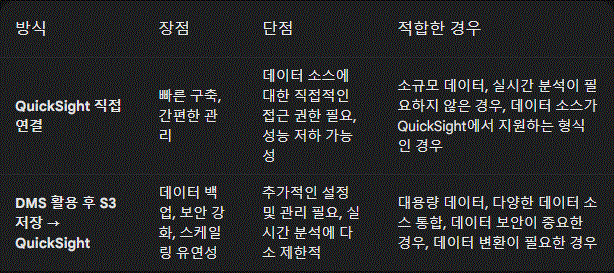

## 복제 인스턴스 및 앤드포인트 설정 시 주의사항

1. **REPLICATION CLIENT**
    * 역할: 이 권한을 가진 사용자는 MySQL 서버의 복제 상태를 확인할 수 있는 권한을 가집니다.
    * 주요 기능: 서버의 복제 관련 상태 정보(마스터 및 슬레이브 상태 등)를 조회, SHOW MASTER STATUS 및 SHOW SLAVE STATUS와 같은 명령을 실행할 수 있음
    * 사용 예시: 복제 설정 중에 마스터 서버에서 바이너리 로그 파일 및 위치를 확인하기 위해 사용, 슬레이브 서버에서 복제 지연이나 다른 상태를 모니터링할 때 필요 필요합니다.

2. **REPLICATION SLAVE**
    * 역할: 이 권한을 가진 사용자는 다른 MySQL 서버의 마스터 데이터베이스에서 데이터 변경 사항을 읽고 복제할 수 있음, 슬레이브 서버가 마스터 서버에서 데이터를 읽어올 수 있도록 허용, 마스터 서버에서 복제 로그를 읽어오는 데 사용됨
    * 사용 예시: 슬레이브 서버가 마스터 서버의 데이터를 복제하기 위해 필요한 권한. 슬레이브는 이 권한을 사용하여 마스터 서버의 바이너리 로그 파일을 읽고 이를 기반으로 자신의 데이터베이스를 업데이트업데이트

### 두 권한의 필요성
* MySQL 복제나 AWS DMS와 같은 복제 관련 작업을 설정할 때는 이러한 권한들이 필요
* 특히 DMS는 소스 데이터베이스의 데이터를 읽어오기 위해 REPLICATION SLAVE 권한을 사용하며, 복제 상태를 모니터링하기 위해 REPLICATION CLIENT 권한을 필요로 할 수 있음
* 이러한 권한을 적절히 설정하고 부여함으로써 데이터 복제를 안전하고 원활하게 수행할 수 있기 때문에 두 권한은 설정하는것이 권장됨

## AWS S3(Data lake)

* AWS에서 제공하는 객체 스토리지 서비스, 확장성이 뛰어나고 높은 가용성을 제공
* 데이터 베이스나 각종 로그의 데이터들이 통계 및 분석 툴로 가기 전, 데이터를 일관된 형태로 보관하는 역할

### 특징
* 확장성: 거의 무제한으로 데이터를 저장할 수 있으며, 데이터의 크기와 파일 수에 제한이 없습니다.
* 내구성: 데이터를 여러 가용 영역에 자동으로 복제하여 높은 내구장합니다.
* 보안: 암호화와 액세스 제어 기능을 통해 데이터 보안을 강화할 수 있습니다.
* 비용 효율성: 사용한 만큼 비용을 지불하는 방식으로, 저장 용량과 데이터 전송량에 기반한 과금 체계니다.수도 있다.

## AWS Athena

*  S3에 저장된 데이터를 기반으로 동작하는 서버리스 분산형 SQL엔진, 서버리스 인터랙티브 쿼리 서비스로, Amazon S3에 저장된 데이터를 표준 SQL을 사용하여 쿼리할 수 있음
*  쉽게 말해, 사용자는 데이터를 불러오거나 인프라를 설정할 필요 없이 바로 쿼리할 수 있음

### 특징
* 서버리스: 인프라를 관리할 필요가 없으며, 사용한 쿼리 런타임에 대해서만 비용합니다.
* 표준 SQL 지원: SQL을 사용하여 데이터를 쿼리하고 분석음있습니다.
* 빠른 데이터 분석: S3에 저장된 데이터에 대해 빠르게 쿼리를 실행할 수 있어, 데이터 웨어하우스 없이도 가능합니다.
* 통합: 다양한 데이터 형식(JSON, CSV, Parquet 등)을 지원하며, Amazon QuickSight와 같은 시각화 도구와합니다.니다.

## AWS Glue

* 완전 관리형 ETL(Extract, Transform, Load) 서비스, 데이터를 준비하고 변환하는 데 도움을 줌.
* Glue는 데이터를 쉽게 이동하고 준비할 수 있도록 다양한 도구를 제공함

### 특징
* 서버리스 ETL: 서버리스로 제공되어 인프라를 관리할 필요가 없습니다. 사용자는 ETL 작업을 정의하고 Glue가 이합니다.
* 데이터 카탈로그: Glue는 메타데이터를 관리하는 데이터 카탈로그를 제공하여, 데이터 소스의 스키마 정보를 중앙에서 관리하고 탐색할 수 있게 합니다.
* 자동 스키마 추출: Glue 크롤러를 사용하여 데이터 소스의 스키마를 자동으로 추출하고 카탈로그에 저장할 수 있습니다.
* 데이터 변환 및 준비: Python 기반의 PySpark 코드를 사용하여 데이터를 변환하고 준비할 수 있습니다.
이 세 가지 서비스는 AWS 데이터 레이크와 분석 환경에서 핵심적인 역할을 하며, 데이터를 저장, 쿼리, 변환하는 데 필요한 기본적을 제공합니다.합니다.

## 목적에 맞는 데이터베이스 선택

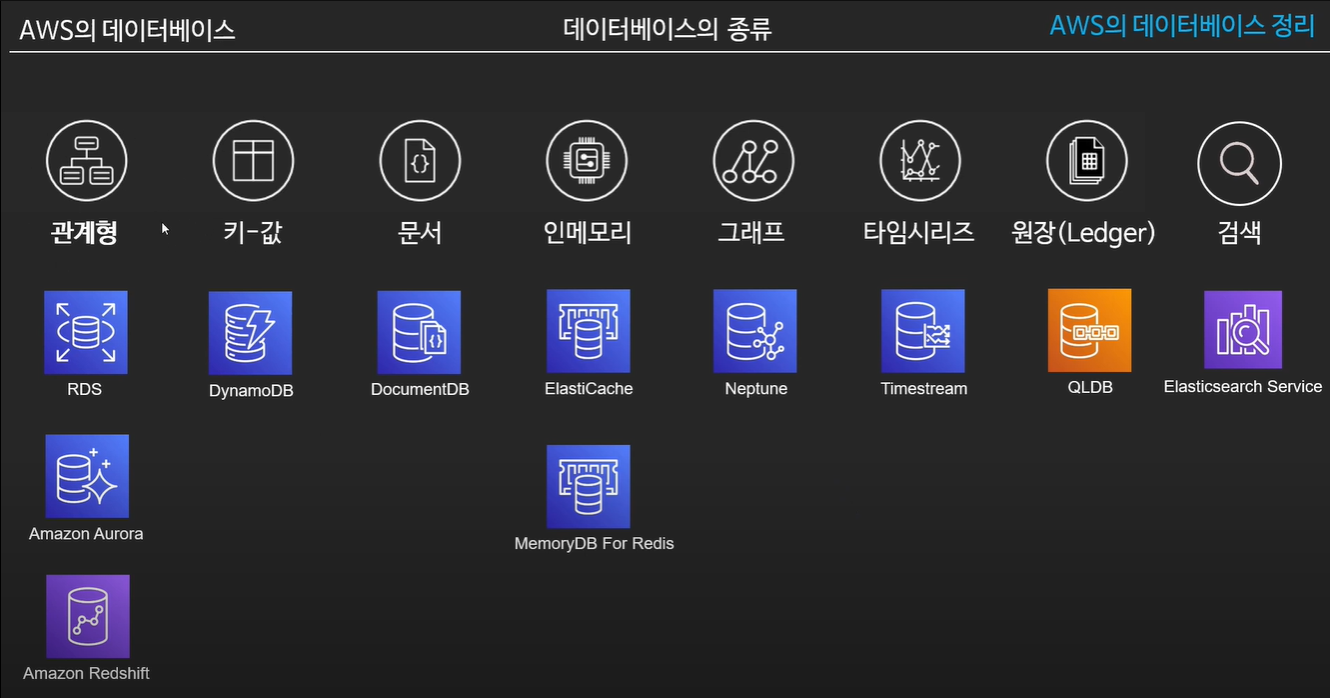

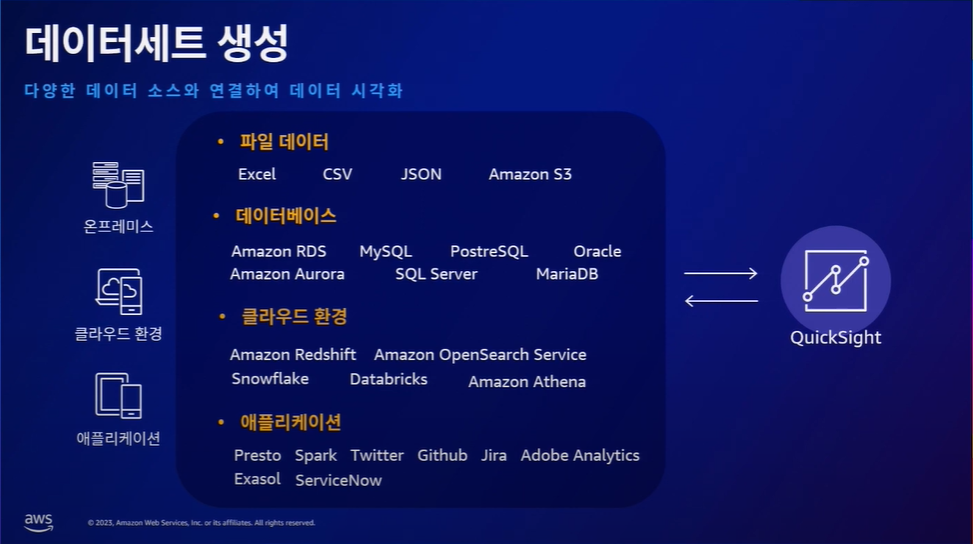

## QuickSight의 분석과정

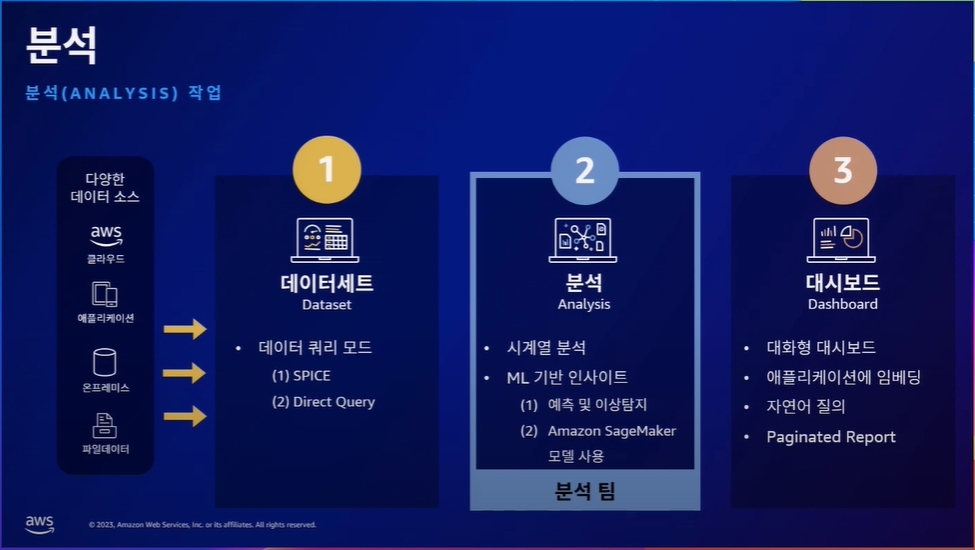

## 유용한 기능

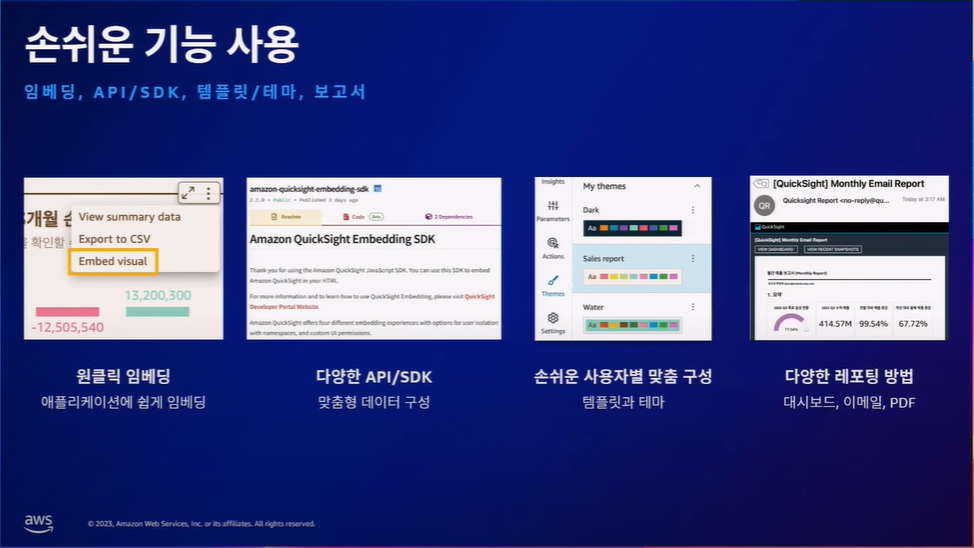

## 데이터 쿼리 모드

### 1. SPICE

* QuickSight의 인메모리 데이터 엔진, 데이터를 QuickSight 내부의 고성능 메모리 엔진에 로드하여 쿼리를 매우 빠르게 실행할 수 있음

### 특징
* 빠른 성능: 데이터가 SPICE 메모리에 저장되어 있어, 쿼리가 매우 빠르게 수행됩니다. 특히 복잡한 계산이나 대규모 데이터 세트에서 성능 이점이 크다.
* 비용 절감: SPICE 용량을 구입하여 데이터를 저장하고, 쿼리를 실행할 때 데이터 소스에 대한 비용이 발생하지 않으므로 비용 효율적
* 오프라인 액세스: 데이터가 SPICE에 로드되므로 데이터 소스가 오프라인 상태여도 대시보드를 계속 사용할 수 있음
* 최대 데이터 크기 제한: SPICE에 로드할 수 있는 데이터의 크기에 제한이 있으며, 더 많은 데이터가 필요하면 SPICE 용량을 추가 구매해야 합니다.

### 예시사례

* 사용자가 자주 반복해서 조회하는 데이터에 대해 빠른 응답 시간이 필요한 경우.
* 데이터 소스에 자주 연결할 수 없거나 오프라인 상태에서도 대시보드가 필요할 때.
* 비용을 절감하면서도 대시보드 성능을 유지하고자 할 때.

### 2. Direct Query

* QuickSight에서 실시간으로 데이터 소스에 쿼리를 실행하는 방식
* 데이터를 미리 SPICE에 로드하지 않고, 사용자가 대시보드를 조회할 때마다 데이터 소스에 쿼리를 수행

### 특징
* 실시간 데이터 접근: 항상 최신 데이터를 쿼리할 수 있습니다. 데이터가 자주 업데이트되거나 실시간 데이터가 필요한 경우 적합합니다.
* 대용량 데이터 지원: SPICE의 메모리 제한 없이 대규모 데이터를 쿼리할 수 있습니다.
* 데이터 소스 비용: 데이터 소스에 직접 쿼리를 수행하기 때문에, 데이터 소스에서 발생하는 비용(예: 데이터베이스 쿼리 비용)이 추가될 수 있습니다.
* 속도: 데이터 소스의 성능에 따라 쿼리 속도가 결정되므로, 데이터 소스의 처리 성능에 영향을 받을 수 있음.

### 예시사례

* 데이터를 실시간으로 업데이트하고 최신 상태를 유지해야 하는 경우.
* SPICE 메모리 제한을 초과하는 대규모 데이터에 대한 분석이 필요한 경우
* 데이터 소스에 특화된 고급 기능(예: 데이터베이스 내 특정 함수나 프로시저)을 사용해야 할 때